In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import ipywidgets as widgets
import tkinter as tk
import cv2
from tkinter import filedialog


images = np.load("X_train_reg.npy")
labels = np.load("Y_train_reg.npy")

images = images.reshape([60000,32, 32,1])

In [3]:
dataset = tf.data.Dataset.from_tensor_slices((images, labels))
train_dataset = dataset.take(50000)
test_dataset = dataset.skip(50000)

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])


history = model.fit(train_dataset, epochs=10)

Epoch 1/10
782/782 [==============================] - 21s 26ms/step - loss: 0.0883 - sparse_categorical_accuracy: 0.9733
Epoch 2/10
782/782 [==============================] - 20s 26ms/step - loss: 0.0237 - sparse_categorical_accuracy: 0.9927
Epoch 3/10
782/782 [==============================] - 21s 26ms/step - loss: 0.0123 - sparse_categorical_accuracy: 0.9963
Epoch 4/10
782/782 [==============================] - 21s 26ms/step - loss: 0.0071 - sparse_categorical_accuracy: 0.9979
Epoch 5/10
782/782 [==============================] - 20s 26ms/step - loss: 0.0036 - sparse_categorical_accuracy: 0.9988
Epoch 6/10
782/782 [==============================] - 20s 26ms/step - loss: 0.0029 - sparse_categorical_accuracy: 0.9991
Epoch 7/10
782/782 [==============================] - 21s 26ms/step - loss: 0.0017 - sparse_categorical_accuracy: 0.9995
Epoch 8/10
782/782 [==============================] - 21s 26ms/step - loss: 8.9717e-04 - sparse_categorical_accuracy: 0.9997
Epoch 9/10
782/782 [========

157/157 - 1s - loss: 0.0509 - sparse_categorical_accuracy: 0.9937 - 1s/epoch - 7ms/step


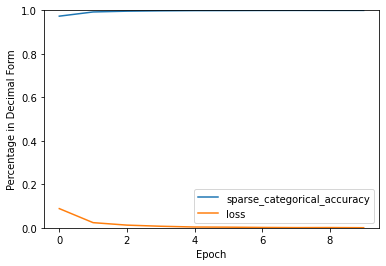

In [18]:
plt.plot(history.history['sparse_categorical_accuracy'], label='sparse_categorical_accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Percentage in Decimal Form')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_dataset, verbose=2)

[7]


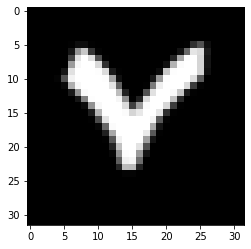

In [9]:
test_img_7 = cv2.imread("7.png",0)
test_img_7 = cv2.resize(test_img_7,(32,32)).astype('float32')
test_img_7 = (255-test_img_7)
test_img_7 = test_img_7 / 255
test_img_7 = test_img_7.reshape(1,32,32,1)
plt.imshow(test_img_7.reshape([32,32]), cmap='gray')

prediction = model.predict(test_img_7)
classes = np.argmax(prediction, axis = 1)
print(classes)

[4]


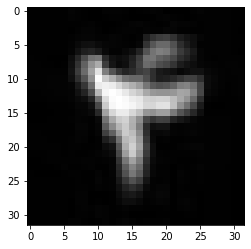

In [8]:
test_img_4 = cv2.imread("4.png",0)
test_img_4 = cv2.resize(test_img_4,(32,32)).astype('float32')
test_img_4 = (255-test_img_4)
test_img_4 = test_img_4 / 255
test_img_4 = test_img_4.reshape(1,32,32,1)
plt.imshow(test_img_4.reshape([32,32]), cmap='gray')

prediction = model.predict(test_img_4)
classes = np.argmax(prediction, axis = 1)
print(classes)